# Gas Cloud
In this activity you will create your own word clouds using a subset of the Reuters corpus. 

In [1]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download wordnet corpora
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()


Bad key "text.kerning_factor" on line 4 in
/usr/local/Caskroom/miniconda/base/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pankajkumar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# Get reuters stories where categories='gas'
ids = reuters.fileids(categories='gas')
corpus = [reuters.raw(i) for i in ids]
len(corpus)

54

In [12]:
corpus[:2]

["FINNS AND CANADIANS TO STUDY MTBE PRODUCTION PLANT\n  Finland's national oil company Neste Oy\n  &lt;NEOY.HE> said in a statement it had agreed with Canadian firms\n  to study the feasibility of building a plant in Edmonton,\n  Canada, to produce a replacement for lead in petrol.\n      The prospective plant would cost an estimated 270 mln\n  Canadian dlrs and would produce methyl tertiary butyl ether\n  (MTBE) from raw materials available locally, it said.\n      The partners in the study are Neste Oy, Celanese Canada\n  Inc, Hoechst Celanese Corporation and Trade Mountain Pipe Line\n  Company Ltd, of Vancouver, B.C.\n      The Edmonton site was suitable because of the raw materials\n  availability, the proximity to pipeline transportation and the\n  important capital and operating advantages gained by locating\n  on an existing Celanese Canada site, the statement said.\n      The partners would look into the feasibility of a plant\n  producing 500,000 tonnes per annum of MTBE, an o

In [3]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [13]:
# Process text for wordcloud creation
big_string = ' '.join(corpus)
input_words = process_text(big_string)
input_words

'finns canadians study mtbe production plant finlands national oil company neste oy ltneoyhe said statement agreed canadian firm study feasibility building plant edmonton canada produce replacement lead petrol prospective plant would cost estimated mln canadian dlrs would produce methyl tertiary butyl ether mtbe raw material available locally said partner study neste oy celanese canada inc hoechst celanese corporation trade mountain pipe line company ltd vancouver bc edmonton site wa suitable raw material availability proximity pipeline transportation important capital operating advantage gained locating existing celanese canada site statement said partner would look feasibility plant producing tonne per annum mtbe octane enhancer replace tetra ethyl lead mtbe would targeted united states lead level gasoline lowered health concern statement added canadian lead limit currently time high us limit lead scheduled virtual elimination canada create canadian demand mtbe said finlands neste oy

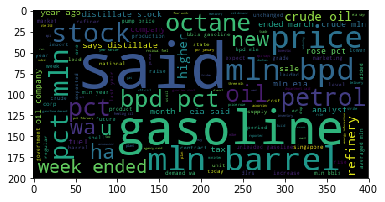

In [5]:
# Generate wordcloud
wc = WordCloud().generate(input_words)
plt.imshow(wc)

## Challenge

In [6]:
from nltk.util import ngrams

In [7]:
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

In [14]:
# Process text for wordcloud creation
input_bigrams = process_text_bg(big_string)
input_bigrams

'finns_canadians canadians_study study_mtbe mtbe_production production_plant plant_finlands finlands_national national_oil oil_company company_neste neste_oy oy_ltneoyhe ltneoyhe_said said_statement statement_agreed agreed_canadian canadian_firm firm_study study_feasibility feasibility_building building_plant plant_edmonton edmonton_canada canada_produce produce_replacement replacement_lead lead_petrol petrol_prospective prospective_plant plant_would would_cost cost_estimated estimated_mln mln_canadian canadian_dlrs dlrs_would would_produce produce_methyl methyl_tertiary tertiary_butyl butyl_ether ether_mtbe mtbe_raw raw_material material_available available_locally locally_said said_partner partner_study study_neste neste_oy oy_celanese celanese_canada canada_inc inc_hoechst hoechst_celanese celanese_corporation corporation_trade trade_mountain mountain_pipe pipe_line line_company company_ltd ltd_vancouver vancouver_bc bc_edmonton edmonton_site site_wa wa_suitable suitable_raw raw_mat

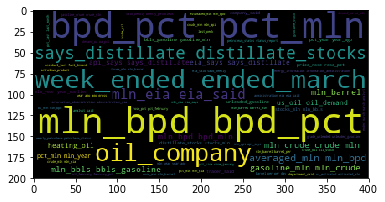

In [9]:
# Generate wordcloud
wc = WordCloud().generate(input_bigrams)
plt.imshow(wc)